In [1]:
%load_ext autoreload
%autoreload

import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

sys.path.append('../')
from LinearModels import display_plot_logreg, display_plot_svc
sys.path.append('../../utils')
from utils import feature_selection, fs_driver

### Features relevance

In [2]:
gt = pd.read_csv('../../../dumps/various_sizes/8K.csv')
cols = [col for col in gt.columns if col not in ['label']]
data = gt[cols]
target = gt['label']

data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 0)

clf = LogisticRegression(C=10, max_iter=1000,random_state=0)
clf.fit(data_train, target_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Text(0, 0.5, 'Feature')

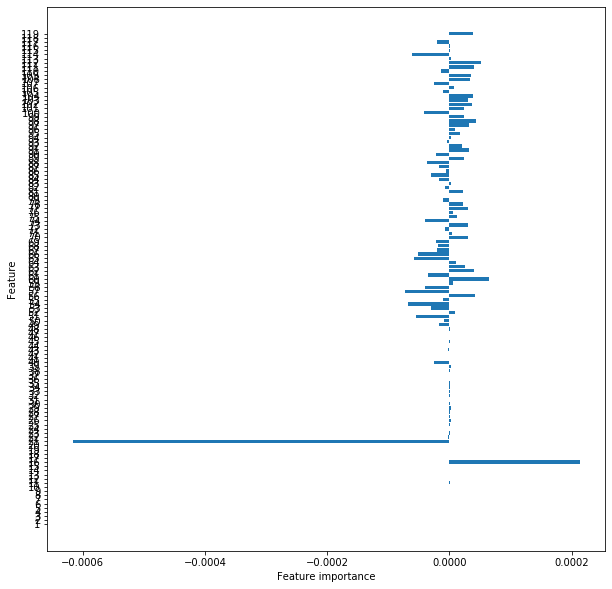

In [3]:
n_features = data.shape[1]
plt.rcParams["figure.figsize"] = (10,10)
plt.barh(range(n_features), clf.coef_[0], align='center') 
plt.yticks(np.arange(n_features), np.arange(1,120)) 
plt.xlabel("Feature importance")
plt.ylabel("Feature")

Here below we will follow an iterative process in order to select the most relevant features of our model. The way it works is as follow : first we start a small training set, measure the accuracy and select the most relevant features using *SelectFromModel*. Then we apply the same reasoning on a slightly larger training set. Between two iterations, the set of features that is kept is the intersection between the current best features and the previous ones. This process is called "iterative process" in the below array. The second row describes the case were we simply keep the K best features and the first one are the default accuracies without tuning.

In [37]:
feature_selection('../../../dumps/various_sizes/8K.csv', 'log')

Execution            # features  Features selected                      Training set acc    Test acc    Time (s)
-----------------  ------------  -----------------------------------  ------------------  ----------  ----------
Classic                     119  ['f1',...,'f119']                              0.908003    0.913674    0.237637
K best features              76  ['f8','f9','f10','f13','f14',                  0.900126    0.901701    0.172472
                                 'f15','f16','f17','f18','f19',
                                 'f20','f39','f48','f49','f50',
                                 'f51','f52','f53','f54','f55',
                                 'f56','f57','f59','f60','f61',
                                 'f62','f63','f64','f65','f66',
                                 'f67','f68','f69','f70','f71',
                                 'f72','f73','f74','f75','f76',
                                 'f77','f78','f79','f80','f81',
                                 'f8

As we can conclude from the above graph and these new results, the model is definitely dependent from many different features (some of them might still have more impact than others) since going from 119 to 76 features decreases the precision by 1.2%. On the other side, although the iterative process is way more slower, the difference between 76 and 19 features is null.

Let's, once more, try the feature extraction on a dataset of 16K samples and see how the performances are impacted.

In [38]:
feature_selection('../../../dumps/various_sizes/16K.csv', 'log')

Execution            # features  Features selected                      Training set acc    Test acc    Time (s)
-----------------  ------------  -----------------------------------  ------------------  ----------  ----------
Classic                     119  ['f1',...,'f119']                              0.898425    0.899002    0.432425
K best features              76  ['f8','f9','f10','f13','f14',                  0.888759    0.887781    0.465437
                                 'f15','f16','f17','f18','f19',
                                 'f20','f39','f49','f50','f51',
                                 'f52','f53','f54','f55','f56',
                                 'f57','f58','f59','f60','f61',
                                 'f62','f63','f64','f65','f66',
                                 'f67','f69','f70','f71','f72',
                                 'f73','f74','f75','f76','f77',
                                 'f78','f79','f80','f81','f82',
                                 'f8

Same observation as before except that now feature selection both decreases slightly the precision but does also increase computation time (it might be because of dataset reconstruction).

### Feature threshold variation

In [4]:
fs_driver('../../../dumps/various_sizes/16K.csv','log',[0.01,0.10,0.20,0.40,0.80])

Threshold : 0.010000
Execution            # features  Features selected                      Training set acc    Test acc    Time (s)
-----------------  ------------  -----------------------------------  ------------------  ----------  ----------
Classic                     119  ['f1',...,'f119']                              0.898425    0.899002    0.439529
K best features              75  ['f8','f9','f10','f13','f14',                  0.888759    0.887781    0.439123
                                 'f15','f16','f17','f18','f19',
                                 'f20','f39','f49','f50','f51',
                                 'f52','f53','f54','f55','f56',
                                 'f57','f58','f59','f60','f61',
                                 'f62','f63','f64','f65','f66',
                                 'f67','f69','f70','f71','f72',
                                 'f73','f74','f75','f76','f77',
                                 'f78','f79','f80','f81','f83',
               

Quite unintuitve to see that around 8-10 features eventually describes most of the model when we look at features dispersion.